In [1]:
# Import necessary Libraries

In [2]:
import os ,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from numpy import log
from pandas import Series
from datetime import datetime

In [3]:
# Importing the dataset

In [4]:
df= pd.read_csv('airline_passengers.csv')

In [5]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.dtypes

Month                      object
Thousands of Passengers     int64
dtype: object

In [7]:
# Changing the datatype of Month to datetime

In [8]:
df['Month']=pd.to_datetime(df['Month'])

In [9]:
df.dtypes

Month                      datetime64[ns]
Thousands of Passengers             int64
dtype: object

In [10]:
#Setting datatime column as Index

In [11]:
df=df.set_index('Month')

In [12]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
df.loc['1950-01-01']

Thousands of Passengers    115
Name: 1950-01-01 00:00:00, dtype: int64

In [14]:
# Trend Analysis

<AxesSubplot:xlabel='Month'>

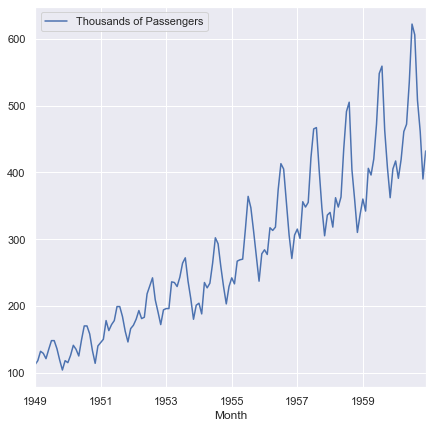

In [15]:
df.plot(figsize=(7,7))

In [16]:
from pylab import rcParams
rcParams['figure.figsize']=12,8

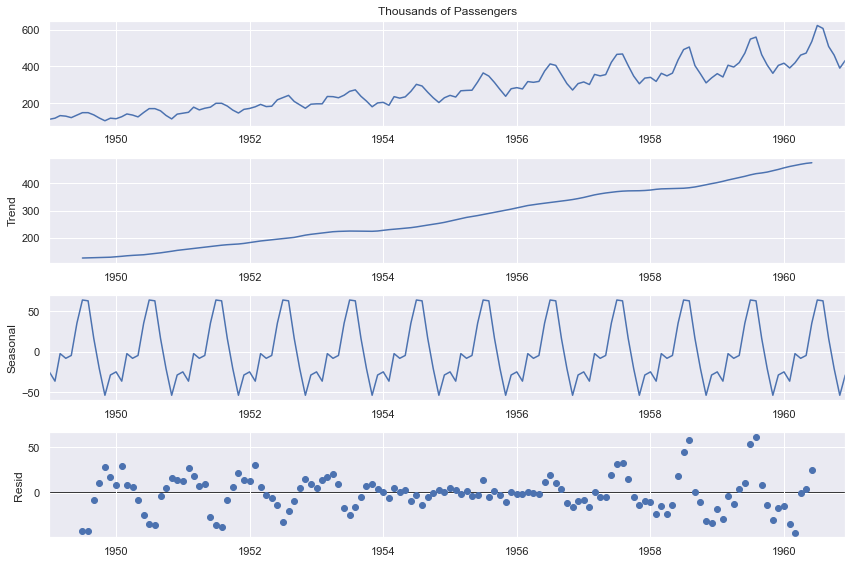

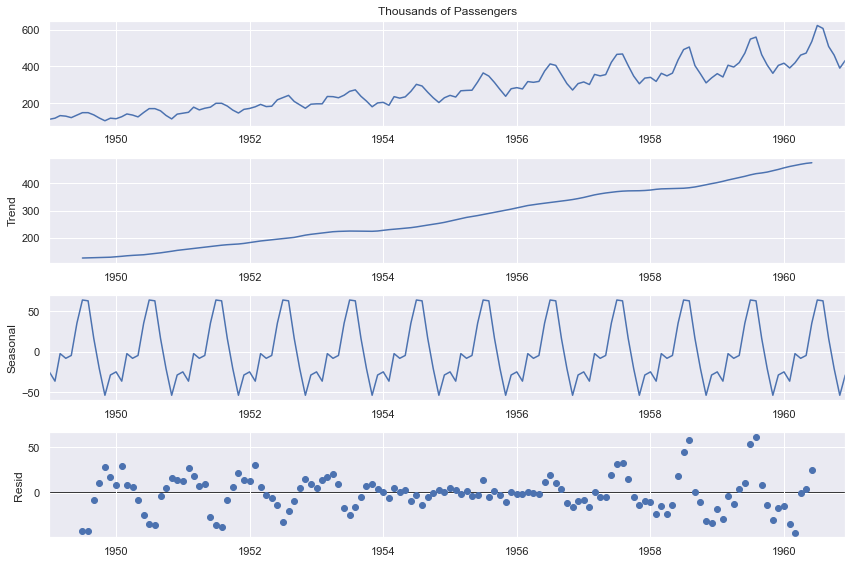

In [17]:
# Decomposition required
from statsmodels.tsa.seasonal import seasonal_decompose
dcm=seasonal_decompose(df['Thousands of Passengers'],model='additive',period=12)
dcm.plot()

In [18]:
#check the auto corelation by Durbinwatsontest
import statsmodels.api as sm
sm.stats.durbin_watson(df['Thousands of Passengers'])

0.0121527966037621

In [19]:
# Checking whether the datasetis stationary, check by Augmented Decay Fuller test
def ADFT (dataset):
    from statsmodels.tsa.stattools import adfuller
    result=adfuller(dataset)
    lables=['ADF_test','p_value','Lag_value','No_of_observations']
    for i,j in zip(result,lables):
        print(j+'='+str(i))
    if result[1]>=0.05:
        return ('Non-stationary')
    else:
        return ('Stationary')
        


In [20]:
ADFT (df['Thousands of Passengers'])

ADF_test=0.8153688792060543
p_value=0.9918802434376411
Lag_value=13
No_of_observations=130


'Non-stationary'

In [21]:
df['1st_diff']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1)

In [22]:
df.head()

,Thousands of Passengers,1st_diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [23]:
ADFT (df['1st_diff'].dropna())

ADF_test=-2.8292668241700034
p_value=0.054213290283824954
Lag_value=12
No_of_observations=130


'Non-stationary'

In [24]:
df['2nd_diff']=df['1st_diff']-df['1st_diff'].shift(1)

In [25]:
df.head()

,Thousands of Passengers,1st_diff,2nd_diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [26]:
ADFT (df['2nd_diff'].dropna())

ADF_test=-16.384231542468488
p_value=2.7328918500143186e-29
Lag_value=11
No_of_observations=130


'Stationary'

In [27]:
df['seasonality']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)

In [28]:
df

,Thousands of Passengers,1st_diff,2nd_diff,seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [29]:
ADFT (df['seasonality'].dropna())

ADF_test=-3.3830207264924805
p_value=0.011551493085514982
Lag_value=1
No_of_observations=130


'Stationary'

In [30]:
# Trend: pdq
#p=?         * Partial auto corelation
#d=lag difference=2 * decay fuller test
#q=?         *Autocorelation

# Sesonality : PDQ
#P=?          * Partial auto corelation
#D=Lag difference=1  * decay fuller test
#Q=?         * autocorelation

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

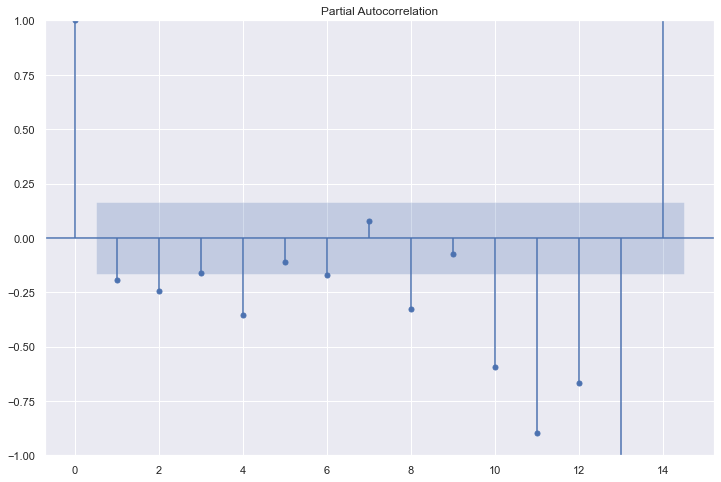

In [32]:
# Trend
plot_pacf(df['2nd_diff'].dropna(),lags=14)
plt.show()

In [33]:
# Trend: pdq
#p=?- Partial auto corelation = 4 by pacf plot
#d=?- lag difference=2  by decay fuller test
#q=?         *Autocorelation

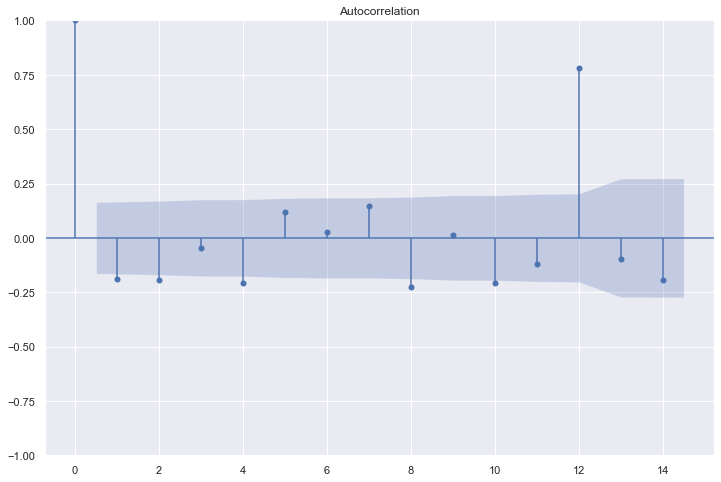

In [34]:
plot_acf(df['2nd_diff'].dropna(),lags=14)
plt.show()

In [35]:
# Trend: pdq
#p=?- Partial auto corelation = 4 by pacf plot
#d=?- lag difference=2  by decay fuller test
#q=?- Autocorelation =2 by acf plot

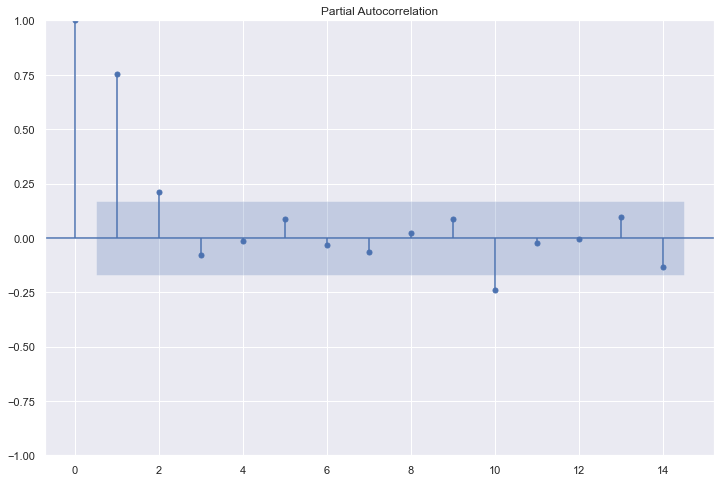

In [36]:
# seasonality
plot_pacf(df['seasonality'].dropna(),lags=14)
plt.show()

In [37]:
# Sesonality : PDQ
#P=?- Partial auto corelation = 2 by pacf plot
#D=?- Lag difference=1 by decay fuller test
#Q=?- autocorelation

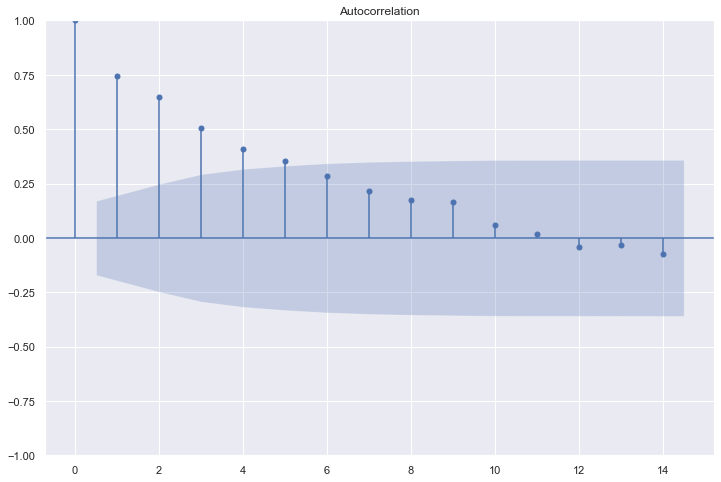

In [38]:
plot_acf(df['seasonality'].dropna(),lags=14)
plt.show()

In [39]:
# Sesonality : PDQ
#P=?- Partial auto corelation = 2 by pacf plot
#D=?- Lag difference=1 by decay fuller test
#Q=?- autocorelation=5 by acf plot

# ARIMA

In [40]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [41]:
model= sm.tsa.statespace.SARIMAX(df['Thousands of Passengers'],order=(4,2,2),seasonal_order=(2,1,1,12))

C:\Users\vinnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vinnu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [42]:
result= model.fit()

C:\Users\vinnu\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:              Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1], 12)   Log Likelihood                -497.783
Date:                              Fri, 19 Apr 2024   AIC                           1015.567
Time:                                      13:56:58   BIC                           1044.242
Sample:                                  01-01-1949   HQIC                          1027.218
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3607      0.097    -14.054      0.000      -1.550      -1.171
ar.L2         -0.49

In [44]:
# AIC- 1021.461, when order=(4,2,2),seasonal_order=(2,1,5,12)
# AIC- 1020.041, when order=(4,2,2),seasonal_order=(2,1,4,12)
# AIC- 1018.314, when order=(4,2,2),seasonal_order=(2,1,3,12)
# AIC- 1017.565, when order=(4,2,2),seasonal_order=(2,1,2,12)
# AIC- 1015.567, when order=(4,2,2),seasonal_order=(2,1,1,12)

In [45]:
df.tail()

,Thousands of Passengers,1st_diff,2nd_diff,seasonality
Month,,,,
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0
1960-11-01,390,-71.0,-24.0,28.0
1960-12-01,432,42.0,113.0,27.0


In [46]:
# predict 1961-01-01 to 1965-12-01

<AxesSubplot:xlabel='Month'>

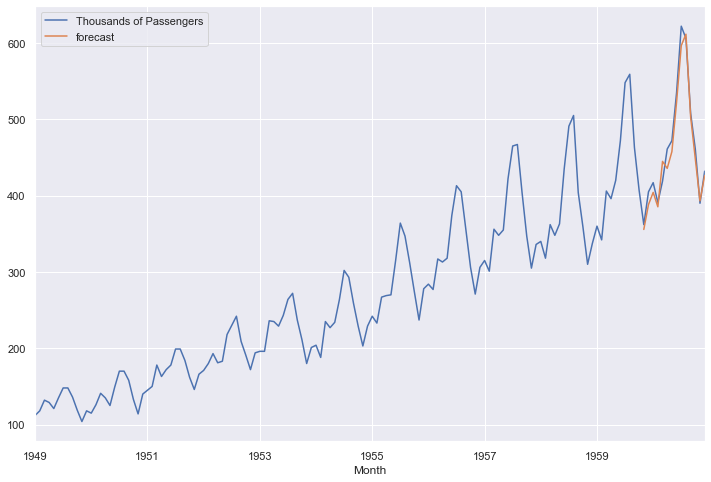

In [47]:
# validate the model using training data
df['forecast']= result.predict(start=130,end=144,dynamic=True)
df[['Thousands of Passengers','forecast']].plot()

In [49]:
# As we can see the graph almost mimicing the trend of actual data, thus we can conclude our forcast to be decent.